In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

### Load all Csv files into memory

In [3]:
path=os.listdir('Sales_Data/')

In [4]:
files=[file for file in path]

In [5]:
print(files,len(files))


['Sales_April_2019.csv', 'Sales_August_2019.csv', 'Sales_December_2019.csv', 'Sales_February_2019.csv', 'Sales_January_2019.csv', 'Sales_July_2019.csv', 'Sales_June_2019.csv', 'Sales_March_2019.csv', 'Sales_May_2019.csv', 'Sales_November_2019.csv', 'Sales_October_2019.csv', 'Sales_September_2019.csv'] 12


##### Merge 12 csv files into a singlw dataframe

In [6]:
data=pd.DataFrame()

for i in files:
    df=pd.read_csv('Sales_Data/'+i)
    data=pd.concat([data,df])
    
    

In [7]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [8]:
data.shape

(186850, 6)

## Clean up the data

##### Drop rows of NaN

In [9]:
na_data=data[data.isna().any(axis=1)]

In [10]:
na_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
data=data.dropna(how='all')

In [12]:
na_data=data[data.isna().any(axis=1)]

In [13]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [14]:
data['Order Date']

0        04/19/19 08:46
2        04/07/19 22:30
3        04/12/19 14:38
4        04/12/19 14:38
5        04/30/19 09:27
              ...      
11681    09/17/19 20:56
11682    09/01/19 16:00
11683    09/23/19 07:39
11684    09/19/19 17:30
11685    09/30/19 00:18
Name: Order Date, Length: 186305, dtype: object

In [15]:
data=data[data['Order Date'].str[0:2]!='Or']

In [16]:
data['Order Date']=data['Order Date'].map(pd.to_datetime)

In [17]:
data['Order Date']

0       2019-04-19 08:46:00
2       2019-04-07 22:30:00
3       2019-04-12 14:38:00
4       2019-04-12 14:38:00
5       2019-04-30 09:27:00
                ...        
11681   2019-09-17 20:56:00
11682   2019-09-01 16:00:00
11683   2019-09-23 07:39:00
11684   2019-09-19 17:30:00
11685   2019-09-30 00:18:00
Name: Order Date, Length: 185950, dtype: datetime64[ns]

###### convert column of correct type

In [18]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


In [19]:
data['Quantity Ordered']=pd.to_numeric(data['Quantity Ordered'])

In [20]:
data['Price Each']=pd.to_numeric(data['Price Each'])

### Add a Sales column into Dataframe/

In [21]:
data['Sales']=data['Quantity Ordered']*data['Price Each']

In [22]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99


In [23]:
data['Order Date'].head()

0   2019-04-19 08:46:00
2   2019-04-07 22:30:00
3   2019-04-12 14:38:00
4   2019-04-12 14:38:00
5   2019-04-30 09:27:00
Name: Order Date, dtype: datetime64[ns]

In [24]:
def get_month(data):
    return data.month
data['Month']=data['Order Date'].map(get_month)

In [25]:
result=data.groupby('Month').sum()

result

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


## plot bar between month  and sales

Text(0.5, 0, 'Month')

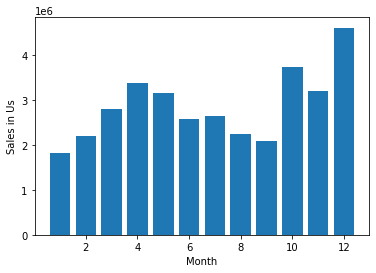

In [26]:
month=range(1,13)
plt.bar(month,result['Sales'])
plt.plot()
plt.ylabel('Sales in Us')
plt.xlabel('Month')

## Add a city column

In [27]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4


In [28]:
def column(x):
    return x.split(',')[1]
def city(x):
    return x.split(',')[2].split(' ')[1]

In [29]:
data['City']=data['Purchase Address'].apply(lambda x:column(x)+'('+city(x)+')')

In [30]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,Dallas(TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston(MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles(CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles(CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles(CA)


In [31]:
result=data.groupby('City').sum()
result

,Quantity Ordered,Price Each,Sales,Month
City,,,,
Atlanta(GA),16602,2.779908e+06,2.795499e+06,104794
Austin(TX),11153,1.809874e+06,1.819582e+06,69829
Boston(MA),22528,3.637410e+06,3.661642e+06,141112
Dallas(TX),16730,2.752628e+06,2.767975e+06,104620
Los Angeles(CA),33289,5.421435e+06,5.452571e+06,208325
New York City(NY),27932,4.635371e+06,4.664317e+06,175741
Portland(ME),2750,4.471893e+05,4.497583e+05,17144
Portland(OR),11303,1.860558e+06,1.870732e+06,70621
San Francisco(CA),50239,8.211462e+06,8.262204e+06,315520


In [32]:
cities=data['City'].unique()

In [33]:
cities

array([' Dallas(TX)', ' Boston(MA)', ' Los Angeles(CA)',
       ' San Francisco(CA)', ' Seattle(WA)', ' Atlanta(GA)',
       ' New York City(NY)', ' Portland(OR)', ' Austin(TX)',
       ' Portland(ME)'], dtype=object)

([<matplotlib.axis.XTick at 0x1111dfc3460>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

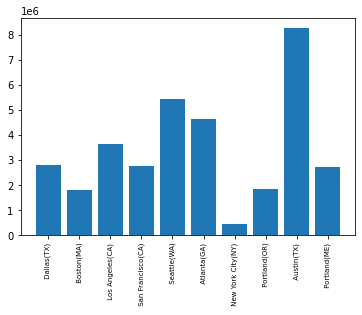

In [34]:
plt.bar(cities,result['Sales'])
plt.xticks(cities,rotation='vertical',size=7)

### What time should we display advertisements to maximize likelihood of customer's buying product?

In [35]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,Dallas(TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston(MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles(CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles(CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles(CA)


In [39]:
def hour(x):
    return x.hour
def min(x):
    return x.minute
data['Hour']=data['Order Date'].map(hour)
data['Min']=data['Order Date'].map(min)

In [40]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City,Hour,Min
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,Dallas(TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston(MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles(CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles(CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles(CA),9,27


In [48]:
hours=[h for h,j in data.groupby('Hour')]

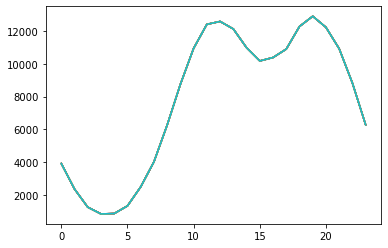

In [51]:
plt.plot(hours,data.groupby('Hour').count())